In [1]:
import torch
import torch.nn as nn
# from torchvision import models
import numpy as np

import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (15, 15)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


## Alexnet pretained on Imagenet

In [20]:
from torchvision import models

model = models.alexnet(pretrained=True)

# remove last fully-connected layer
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier
print model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [21]:
for name, parameter in model.named_parameters():
        if parameter.requires_grad:
            print(name, parameter.shape)
print('    Total params: %.2fM' % (sum(p.numel() for p in model.parameters())/1000000.0))

('features.0.weight', torch.Size([64, 3, 11, 11]))
('features.0.bias', torch.Size([64]))
('features.3.weight', torch.Size([192, 64, 5, 5]))
('features.3.bias', torch.Size([192]))
('features.6.weight', torch.Size([384, 192, 3, 3]))
('features.6.bias', torch.Size([384]))
('features.8.weight', torch.Size([256, 384, 3, 3]))
('features.8.bias', torch.Size([256]))
('features.10.weight', torch.Size([256, 256, 3, 3]))
('features.10.bias', torch.Size([256]))
('classifier.1.weight', torch.Size([4096, 9216]))
('classifier.1.bias', torch.Size([4096]))
('classifier.4.weight', torch.Size([4096, 4096]))
('classifier.4.bias', torch.Size([4096]))
    Total params: 57.00M


In [22]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [9]:
# the parameters are a list of [weights, biases]
filters = model.named_parameters
print('filters', filters)

('filters', <bound method AlexNet.named_parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropou

In [27]:
conv1 = model.features[0].weight
print conv1.shape

torch.Size([64, 3, 11, 11])


In [28]:
print conv1[0]

tensor([[[ 0.1186,  0.0941,  0.0954,  0.1052,  0.1029,  0.0672,  0.0505,
           0.0501,  0.0558,  0.0216,  0.0500],
         [ 0.0749,  0.0389,  0.0530,  0.0760,  0.0723,  0.0729,  0.0520,
           0.0271,  0.0257, -0.0113,  0.0042],
         [ 0.0754,  0.0388,  0.0549,  0.0558,  0.0525,  0.0500,  0.0476,
           0.0253,  0.0436,  0.0102,  0.0133],
         [ 0.0704,  0.0525,  0.0631,  0.0622,  0.0589,  0.0386,  0.0450,
           0.0381,  0.0458,  0.0019,  0.0030],
         [ 0.0873,  0.0750,  0.0716,  0.0834,  0.0946,  0.0654,  0.0335,
           0.0210,  0.0221, -0.0106, -0.0343],
         [ 0.0958,  0.0992,  0.1006,  0.1088,  0.0726,  0.0361, -0.0075,
          -0.0431, -0.0379, -0.0568, -0.0560],
         [ 0.1150,  0.1155,  0.1071,  0.0915,  0.0029, -0.0900, -0.1133,
          -0.1391, -0.1248, -0.0845, -0.0745],
         [ 0.0955,  0.1103,  0.0825,  0.0421, -0.0594, -0.1595, -0.1237,
          -0.1581, -0.1643, -0.1153, -0.0928],
         [ 0.0932,  0.1037,  0.0675,  0.

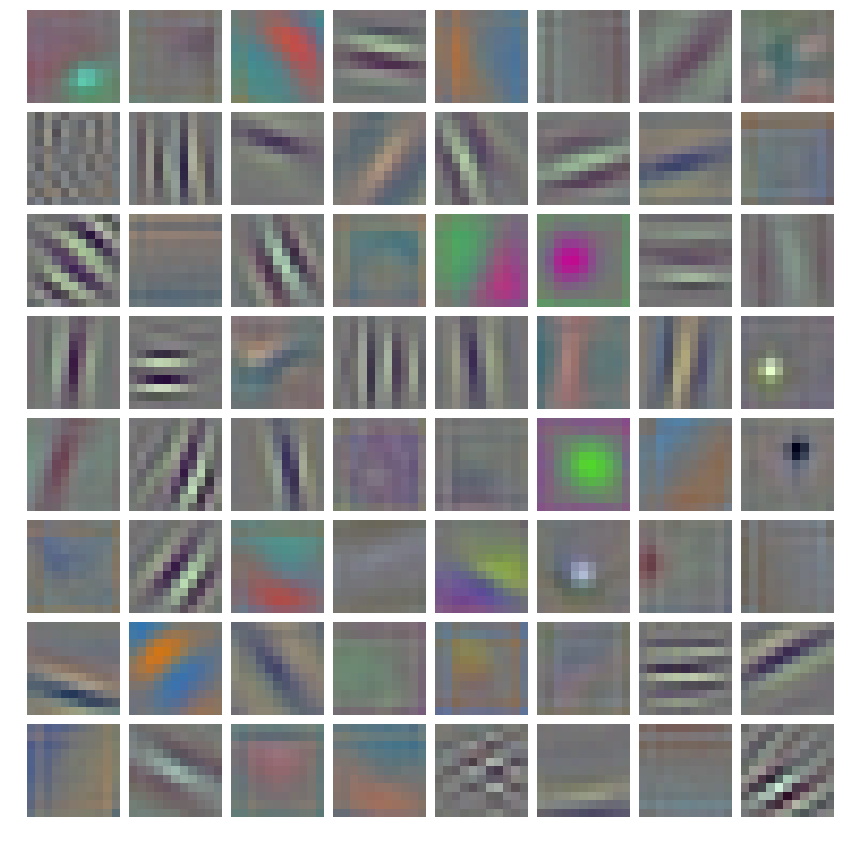

In [29]:
conv1_filter = conv1.detach().numpy()
vis_square(conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

idx [162]
torch.Size([64, 5, 5])


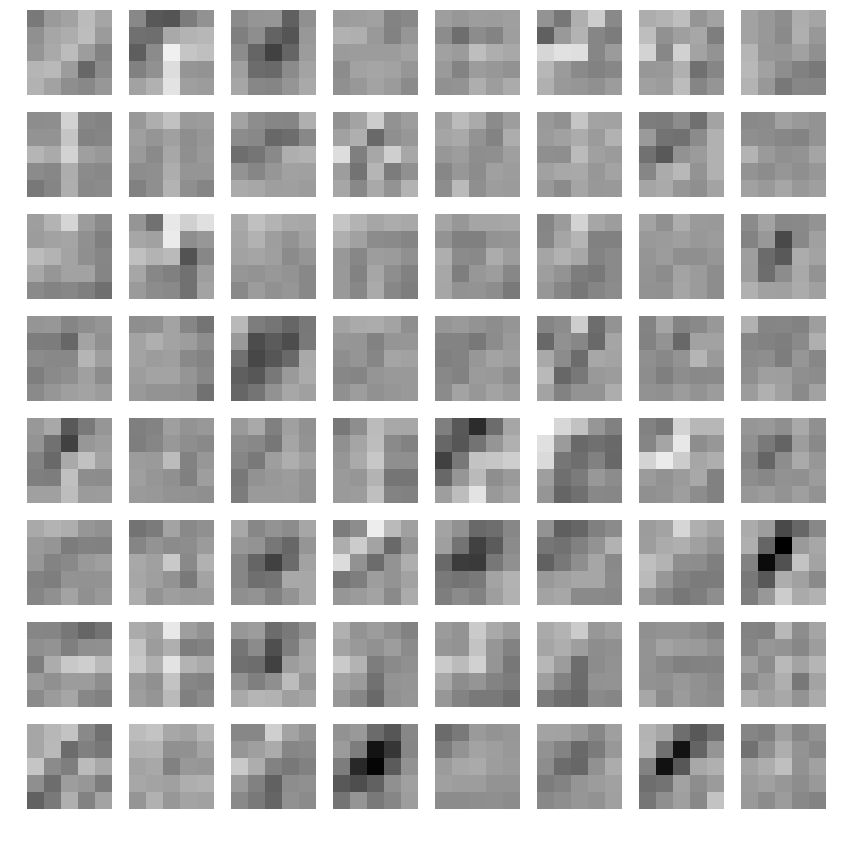

In [30]:
idx = np.random.randint(192, size=1)

print 'idx', idx
conv3 = model.features[3].weight[idx].squeeze(0)
# print conv2

print conv3.shape
conv3_filter = conv3.detach().numpy()
vis_square(conv3_filter)

## Alexnet trained on Cifar 10

In [10]:
import models.cifar as models

model = models.__dict__['alexnet'](num_classes=10)
# print 'model', model

model = torch.nn.DataParallel(model).cuda()

path = '/media/jaden/DeepLearningCode/pytorch-classification/checkpoints/cifar10/alexnet/model_best.pth.tar'
checkpoint = torch.load(path)
best_acc = checkpoint['best_acc']
print 'best_acc', best_acc

model.load_state_dict(checkpoint['state_dict'])

print 'model', model

best_acc tensor(77.8000, device='cuda:0')
model DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [15]:
alex_conv1 = model.module.features[0].weight
print alex_conv1.shape

torch.Size([64, 3, 11, 11])


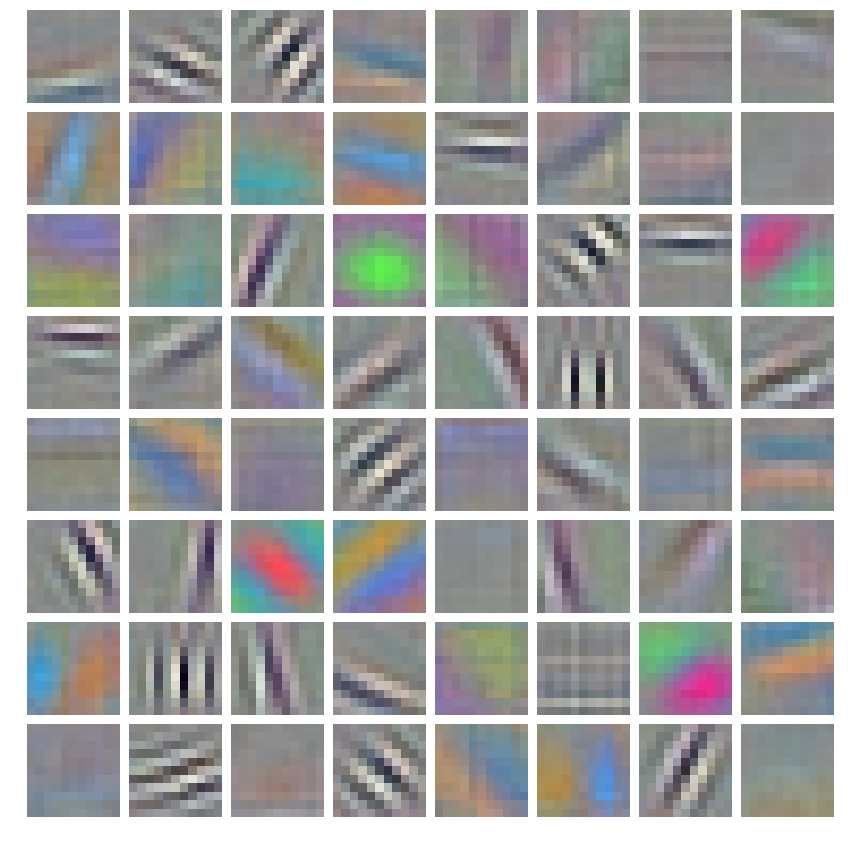

In [17]:
alex_conv1_filter = alex_conv1.detach().cpu().numpy()
vis_square(alex_conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

## Alexnet trained on Cifar 10 with random labels

In [15]:
### 1.0 label-corrupt-prob = 0 (natual lable), but model not optimized well,
### so 1st layer filters are not smooth as successfully trained model

In [8]:
import models.cifar as models

model2 = models.__dict__['alexnet'](num_classes=10)

model2 = torch.nn.DataParallel(model2).cuda()
# model2 = model2.cuda()

path = '/media/jaden/DeepLearningCode/pytorch-classification/fitting_random_labels/checkpoints/cifar10/alexnet/model_best.pth.tar'
checkpoint = torch.load(path)
best_acc = checkpoint['best_acc']
print 'best_acc', best_acc

model2.load_state_dict(checkpoint['state_dict'])

print 'model', model2

best_acc tensor(75.8400, device='cuda:0')
model DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [9]:
r_alex_conv1 = model2.module.features[0].weight
print r_alex_conv1.shape

torch.Size([64, 3, 11, 11])


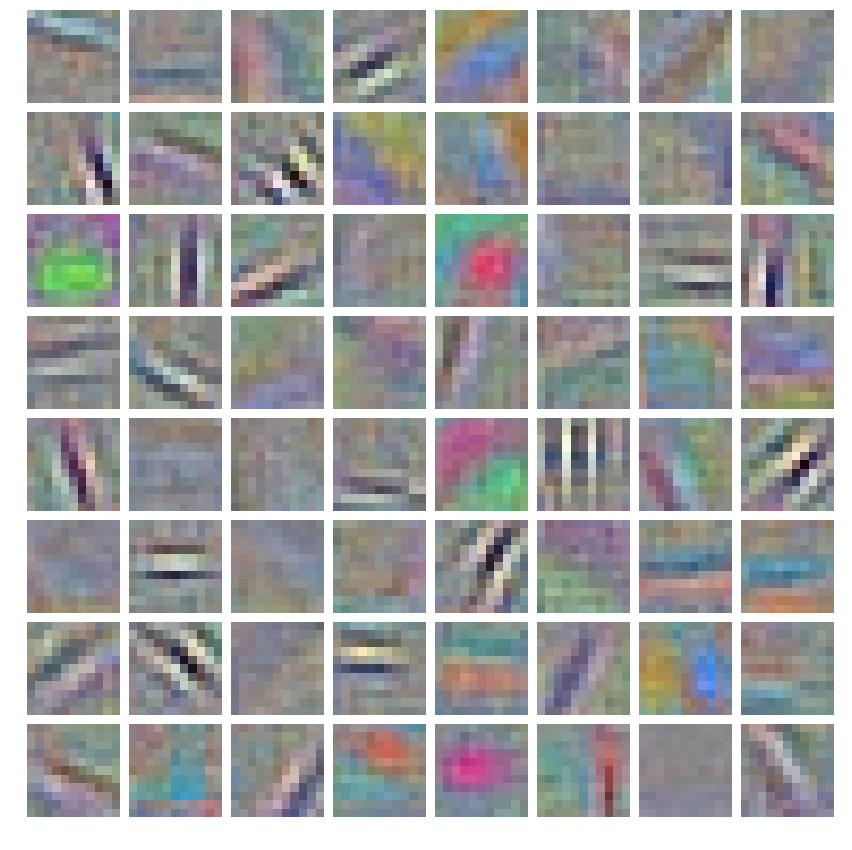

In [14]:
r_alex_conv1_filter = r_alex_conv1.detach().cpu().numpy()
vis_square(r_alex_conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

In [16]:
### 1.0 label-corrupt-prob = 1 

In [17]:
import models.cifar as models

model3 = models.__dict__['alexnet'](num_classes=10)

model3 = torch.nn.DataParallel(model3).cuda()

path = '/media/jaden/DeepLearningCode/pytorch-classification/fitting_random_labels/checkpoints/cifar10/alexnet-r1/model_best.pth.tar'
checkpoint = torch.load(path)
best_acc = checkpoint['best_acc']
print 'best_acc', best_acc

model3.load_state_dict(checkpoint['state_dict'])

print 'model', model3

best_acc tensor(10.3020, device='cuda:0')
model DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [18]:
r3_alex_conv1 = model3.module.features[0].weight
print r3_alex_conv1.shape

torch.Size([64, 3, 11, 11])


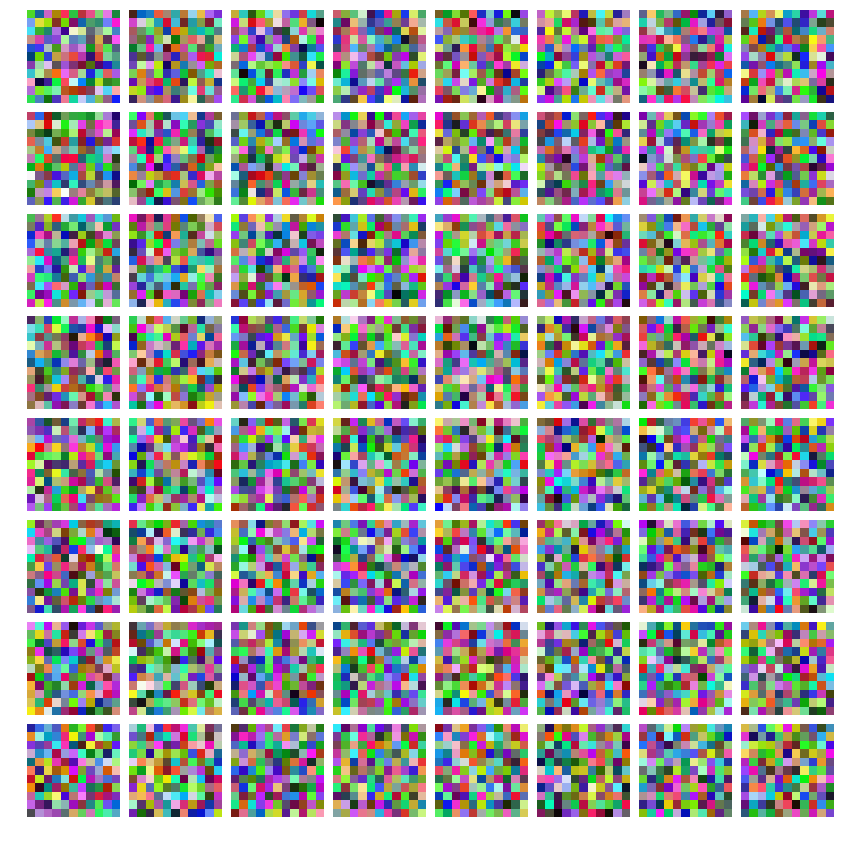

In [19]:
r3_alex_conv1_filter = r3_alex_conv1.detach().cpu().numpy()
vis_square(r3_alex_conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

In [ ]:
### 1.0 label-corrupt-prob = 0.5

In [32]:
import models.cifar as models

model4 = models.__dict__['alexnet'](num_classes=10)

model4 = torch.nn.DataParallel(model4).cuda()

path = '/media/jaden/DeepLearningCode/pytorch-classification/fitting_random_labels/checkpoints/cifar10/alexnet-r5/model_best.pth.tar'
checkpoint = torch.load(path)
best_acc = checkpoint['best_acc']
print 'best_acc', best_acc

model4.load_state_dict(checkpoint['state_dict'])

print 'model', model4

best_acc tensor(99.9800, device='cuda:0')
model DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Linear(in_features=256, out_features=10, bias=True)
  )
)


torch.Size([64, 3, 11, 11])


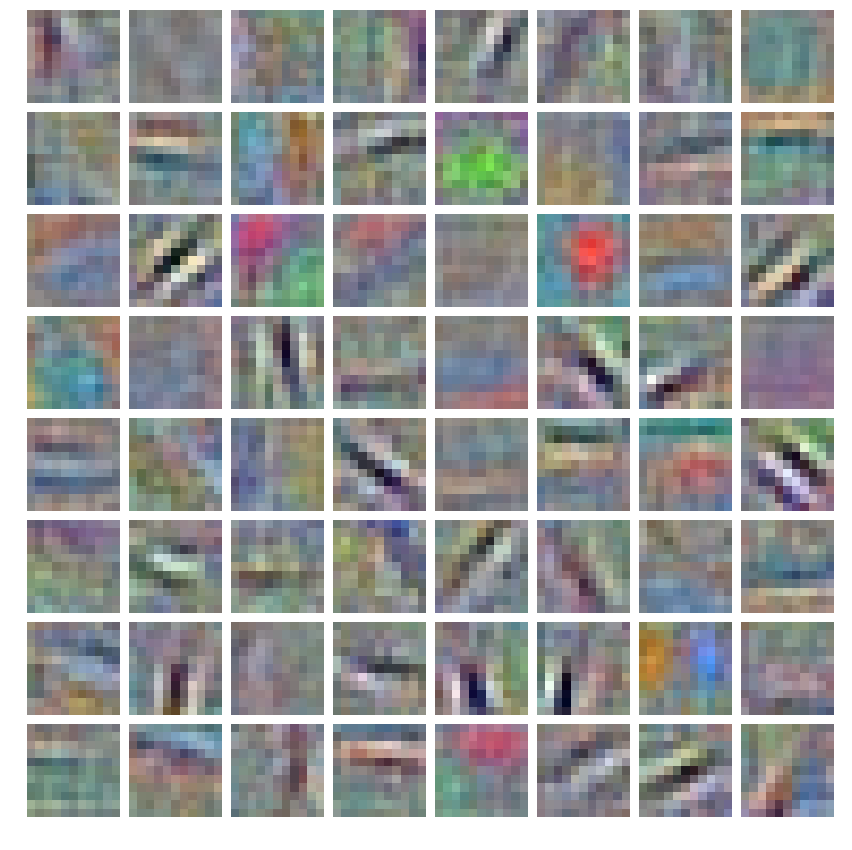

In [33]:
r4_alex_conv1 = model4.module.features[0].weight
print r4_alex_conv1.shape

r4_alex_conv1_filter = r4_alex_conv1.detach().cpu().numpy()
vis_square(r4_alex_conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

In [ ]:
## 1.0 label-corrupt-prob = 0.7

In [34]:
import models.cifar as models

model5 = models.__dict__['alexnet'](num_classes=10)

model5 = torch.nn.DataParallel(model5).cuda()

path = '/media/jaden/DeepLearningCode/pytorch-classification/fitting_random_labels/checkpoints/cifar10/alexnet-r7/model_best.pth.tar'
checkpoint = torch.load(path)
best_acc = checkpoint['best_acc']
print 'best_acc', best_acc

model5.load_state_dict(checkpoint['state_dict'])

print 'model', model5

best_acc tensor(99.8660, device='cuda:0')
model DataParallel(
  (module): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(5, 5))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (classifier): Linear(in_features=256, out_features=10, bias=True)
  )
)


torch.Size([64, 3, 11, 11])


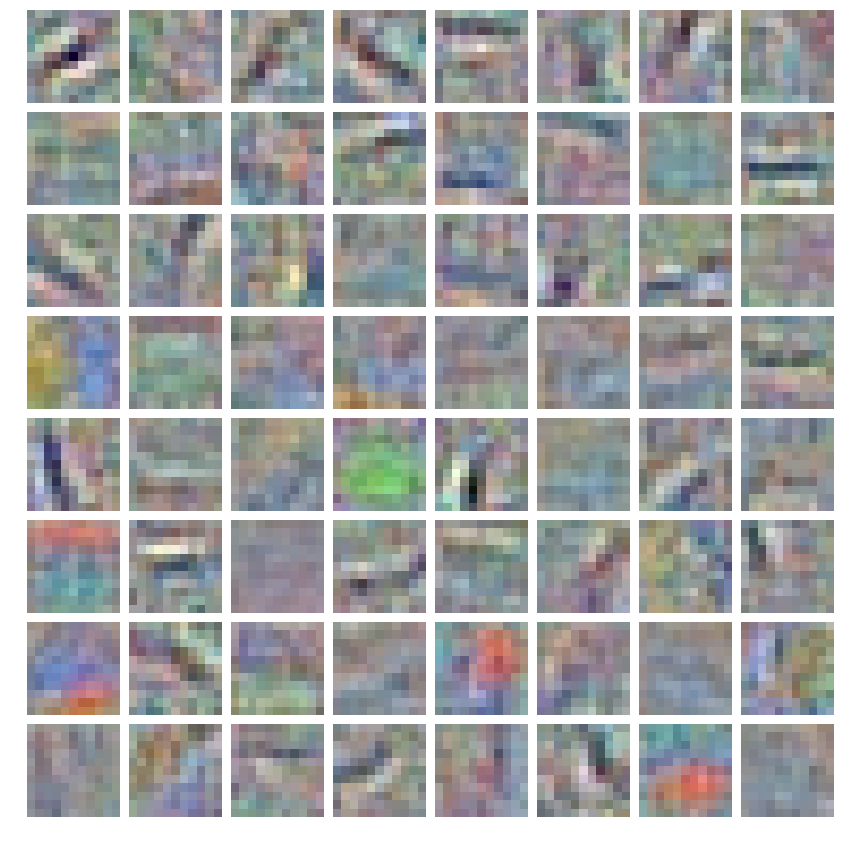

In [35]:
r5_alex_conv1 = model5.module.features[0].weight
print r5_alex_conv1.shape

r5_alex_conv1_filter = r5_alex_conv1.detach().cpu().numpy()
vis_square(r5_alex_conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

In [ ]:
## load faster rcnn model

In [ ]:
path = '/media/jaden/DeepLearningCode/object_detection/faster-rcnn.pytorch/experiments/res101/coco/faster_rcnn_1_10_14657.pth'
